In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../c2c_sim/')
from core.simulate import CCI_MD
seed = 1
dp = '/data2/hratch/cci_dt/figures/'

In [74]:
# initialize
cci = CCI_MD(seed = seed)
cci.cci_network(n_cells = 1000, directional = True, autocrine = True)

In [75]:
cols = ['subcategory', 'skew']
res = pd.DataFrame(columns = cols)
# similarly generate metadata that each cell ID is associated with, do not remove homotypic interactions
for skew in np.arange(0,1.01,0.1):
    cci.generate_metadata(n_cell_cats = {4: skew}, cat_skew = 0, remove_homotypic = 0)
    df = cci.cell_metadata[['subcategory']]
    df['skew'] = skew
    res = pd.concat([res, df])

<ipython-input-75-88ba59975419>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skew'] = skew


In [76]:
# map to consistent category labels across conditions
idx_mapper = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
cat_mapper = dict()
for skew in res['skew'].unique():
    for i, cat in list(enumerate(res[res['skew'] == skew].subcategory.value_counts().index.tolist())):
        cat_mapper[cat] = idx_mapper[i]

res['subcategory'] = res['subcategory'].map(cat_mapper)
cat_order = sorted(res.subcategory.unique())
res["subcategory"] = pd.Categorical(res["subcategory"], categories=cat_order) 

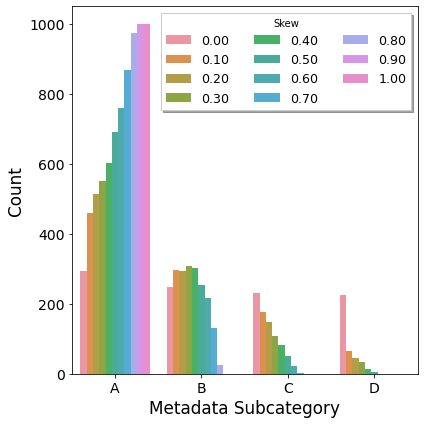

In [90]:
fontsize = 14
fig, ax = plt.subplots(figsize = (6,6))
sns.countplot(data = res, x = 'subcategory', hue = 'skew', ax = ax)
handles, labels = ax.get_legend_handles_labels()
labels = ['{:.2f}'.format(float(i)) for i in labels]
ax.legend(labels=labels, handles = handles,loc = 'upper right', title = 'Skew', 
         fancybox = False, shadow = True, fontsize = 0.9*fontsize, ncol = 3)#bbox_to_anchor=(1.01, 0.8),
ax.set_xlabel('Metadata Subcategory', fontsize = 1.2*fontsize)
ax.set_ylabel('Count', fontsize = 1.2*fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
plt.tight_layout()

for ext in ['.pdf', '.png', '.svg']:
    plt.savefig(dp + 'categorical_skewing' + ext, bbox_inches = 'tight')
